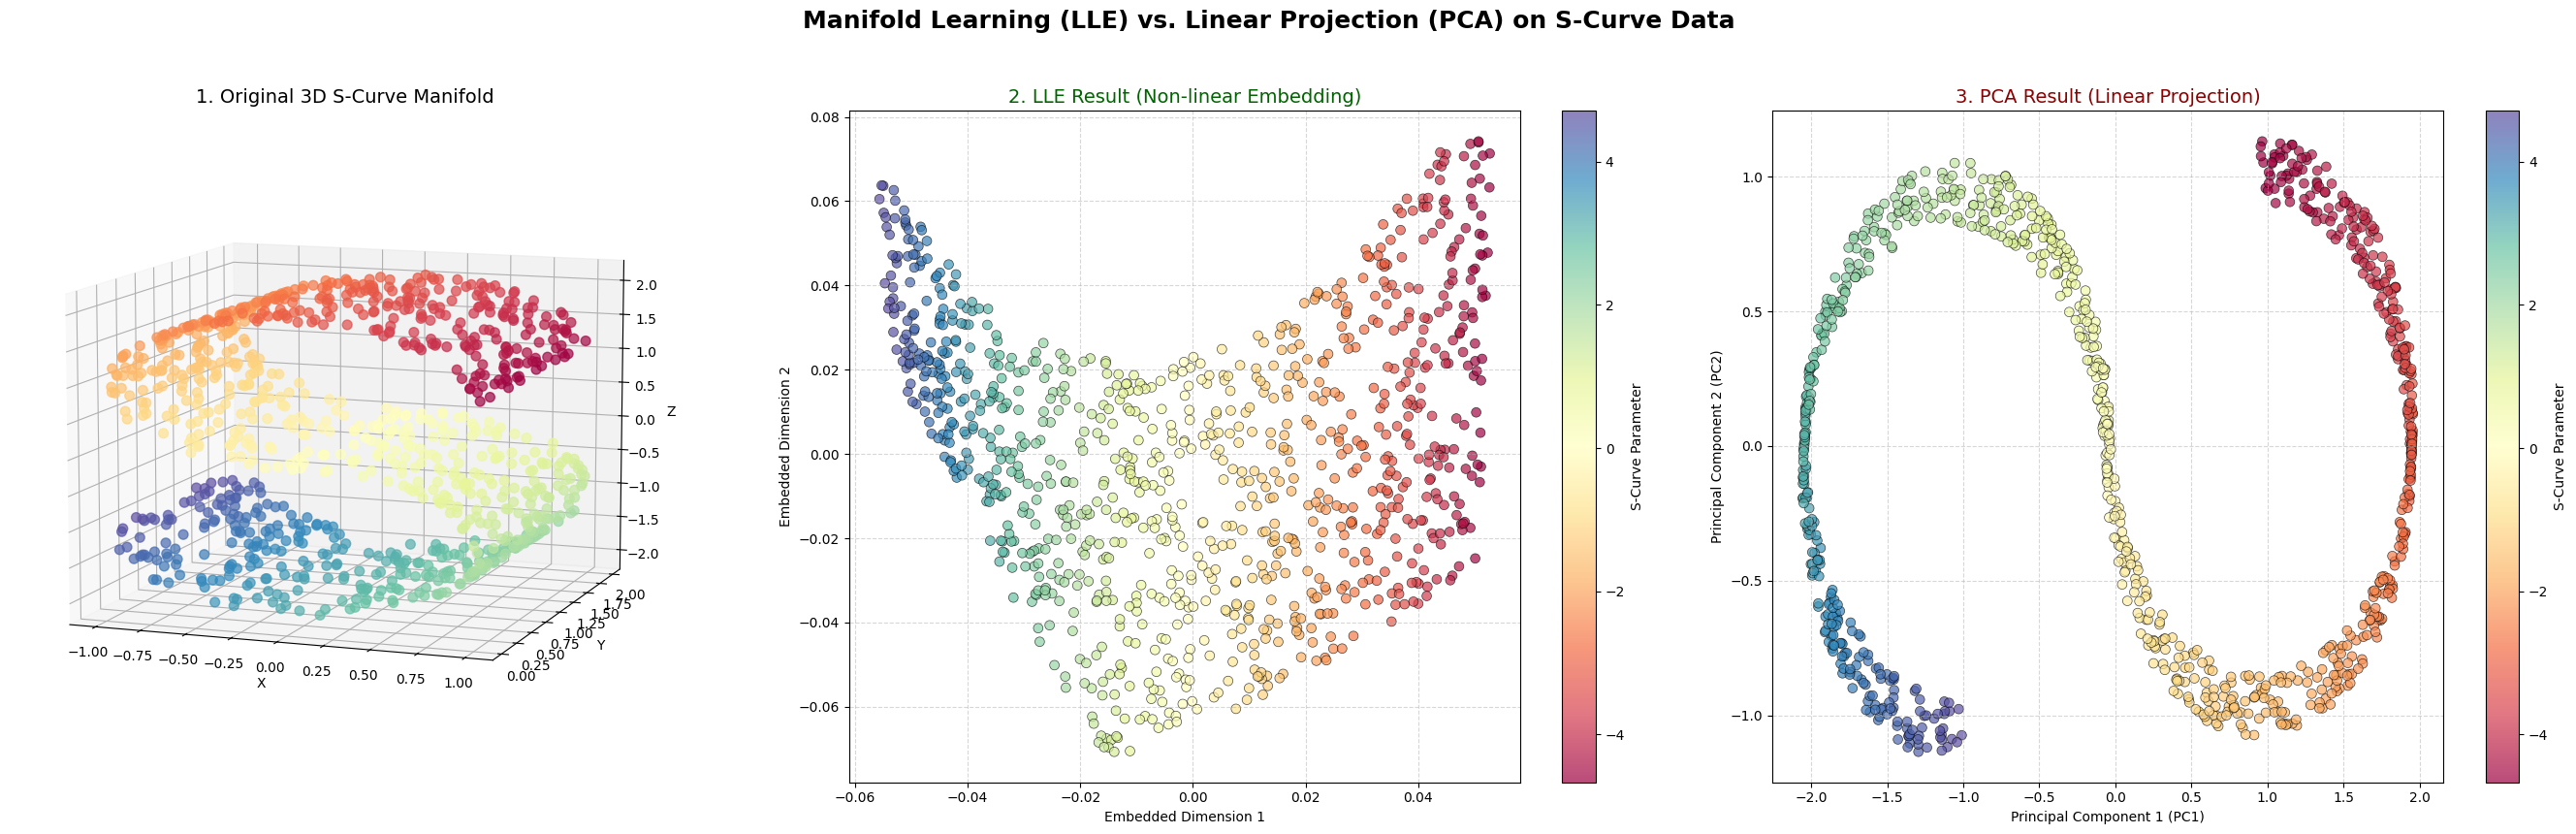

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# ============================================================
# 1. 데이터 생성 및 설정
# ============================================================
n_samples = 1000
n_components = 2 
n_neighbors = 12 

X_np, color_np = make_s_curve(n_samples, random_state=42)
X = torch.tensor(X_np, dtype=torch.float32)
color = torch.tensor(color_np, dtype=torch.float32)


# ============================================================
# 2. LLE 및 PCA 적용
# ============================================================

# LLE 변환
lle = LocallyLinearEmbedding(
    n_neighbors=n_neighbors, 
    n_components=n_components, 
    method='standard', 
    random_state=42
)
Z_lle_np = lle.fit_transform(X_np)
Z_lle = torch.tensor(Z_lle_np, dtype=torch.float32)

# PCA 변환
pca = PCA(n_components=n_components, random_state=42)
Z_pca_np = pca.fit_transform(X_np)
Z_pca = torch.tensor(Z_pca_np, dtype=torch.float32)


# ============================================================
# 3. 통합 시각화 (3개 Subplot)
# ============================================================
fig = plt.figure(figsize=(28, 9))
fig.suptitle('Manifold Learning (LLE) vs. Linear Projection (PCA) on S-Curve Data', fontsize=18, fontweight='bold')

# ------------------------------------------------------------
# Subplot 1: 원본 3D 데이터 시각화
# ------------------------------------------------------------
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], 
                       c=color_np, cmap=plt.cm.Spectral, 
                       s=50, alpha=0.7)
ax1.set_title("1. Original 3D S-Curve Manifold", fontsize=14)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(elev=10, azim=-70) # 시각적 효과를 위해 뷰 각도 설정


# ------------------------------------------------------------
# Subplot 2: LLE 결과 시각화 (비선형 구조 보존)
# ------------------------------------------------------------
ax2 = fig.add_subplot(1, 3, 2)
scatter2 = ax2.scatter(Z_lle_np[:, 0], Z_lle_np[:, 1], 
                       c=color_np, cmap=plt.cm.Spectral, 
                       s=50, alpha=0.7, edgecolor='k', linewidth=0.5)
ax2.set_title(f"2. LLE Result (Non-linear Embedding)", fontsize=14, color='darkgreen')
ax2.set_xlabel('Embedded Dimension 1')
ax2.set_ylabel('Embedded Dimension 2')
ax2.grid(True, linestyle='--', alpha=0.5)
fig.colorbar(scatter2, ax=ax2, label='S-Curve Parameter')


# ------------------------------------------------------------
# Subplot 3: PCA 결과 시각화 (선형 투영)
# ------------------------------------------------------------
ax3 = fig.add_subplot(1, 3, 3)
scatter3 = ax3.scatter(Z_pca_np[:, 0], Z_pca_np[:, 1], 
                       c=color_np, cmap=plt.cm.Spectral, 
                       s=50, alpha=0.7, edgecolor='k', linewidth=0.5)
ax3.set_title(f"3. PCA Result (Linear Projection)", fontsize=14, color='darkred')
ax3.set_xlabel('Principal Component 1 (PC1)')
ax3.set_ylabel('Principal Component 2 (PC2)')
ax3.grid(True, linestyle='--', alpha=0.5)
fig.colorbar(scatter3, ax=ax3, label='S-Curve Parameter')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()